In [2]:
import tensorflow
from tensorflow import keras
import numpy as np

In [3]:
%matplotlib inline

In [4]:
import matplotlib.pyplot as plt

In [5]:
batch_size = 128
num_class = 10
epochs = 20

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
len(x_train)

60000

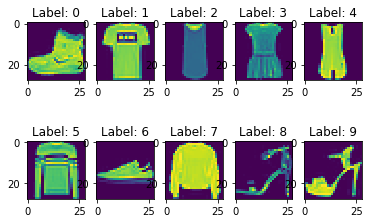

In [8]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("Label: " + str(i))
    plt.imshow(x_train[i].reshape(28, 28), cmap=None)


In [9]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [10]:
model = keras.models.Sequential([
    # 直列に並べる
    keras.layers.Flatten(),
    # 512個のノードを用意、relu = -:0, +:x
    keras.layers.Dense(512, activation='relu'),
    # 一部データを捨てる
    keras.layers.Dropout(0.2),
    # 多クラス -> softmax
    # 10個に集約する
    keras.layers.Dense(10 , activation='softmax')
])

In [11]:
# 最適化関数 RMSpropAdam SGD
# categorical_crossentropy: One-Hot-Encoding [1, 0, 0]とか
# sparse_categorical_crossentropy: 1, 2, 4とか、ターゲットが分類できる時


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 15s 246us/step - loss: 0.4953 - acc: 0.8219
Epoch 2/20
60000/60000 [==============================] - 15s 256us/step - loss: 0.3841 - acc: 0.8584
Epoch 3/20
60000/60000 [==============================] - 15s 251us/step - loss: 0.3499 - acc: 0.8707
Epoch 4/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.3316 - acc: 0.8781
Epoch 5/20
60000/60000 [==============================] - 15s 249us/step - loss: 0.3153 - acc: 0.8827
Epoch 6/20
60000/60000 [==============================] - 14s 227us/step - loss: 0.3029 - acc: 0.8874
Epoch 7/20
60000/60000 [==============================] - 16s 262us/step - loss: 0.2884 - acc: 0.8922
Epoch 8/20
60000/60000 [==============================] - 13s 224us/step - loss: 0.2788 - acc: 0.8955
Epoch 9/20
60000/60000 [==============================] - 13s 225us/step - loss: 0.2732 - acc: 0.8979
Epoch 10/20
60000/60000 [==============================] - 14s 229us/step - loss: 

In [13]:
model.evaluate(x_test, y_test)


10000/10000 [==============================] - 0s 35us/step


[0.3386173463881016, 0.8931]

In [14]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [15]:
# それぞれの画像に対し、0~9 のどれに一番近いか推定
predicted = model.predict(x_test[0:10])

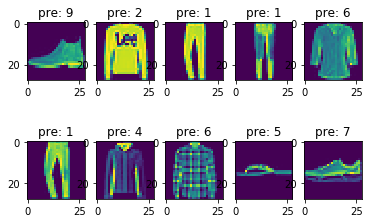

In [16]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.title("pre: " + str(np.argmax(predicted[i])))
    plt.imshow(x_test[i].reshape(28, 28), cmap=None)